<a href="https://colab.research.google.com/github/HibaIbrahimi/Satellite_imagery_segmentation/blob/main/Satellite_imagery_segmentation_ended.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Part 1 : Data Processing


In [2]:
!pip install patchify

In [3]:
import os
import cv2
from PIL import Image
import numpy as np
from patchify import patchify
from sklearn.preprocessing import MinMaxScaler , StandardScaler

from matplotlib import pyplot as plt
import random

In [4]:
minmaxscaler = MinMaxScaler()

In [5]:
!ls -lah '/content/drive/MyDrive/Colab Notebooks/Datasets/Satellite_Imagery_dataset'

total 33K
-rw------- 1 root root  548 Mar  6 21:59  classes.json
drwx------ 4 root root 4.0K Mar  6 22:06 'Tile 1'
drwx------ 4 root root 4.0K Mar  6 22:06 'Tile 2'
drwx------ 4 root root 4.0K Mar  6 22:06 'Tile 3'
drwx------ 4 root root 4.0K Mar  6 22:06 'Tile 4'
drwx------ 4 root root 4.0K Mar  6 22:06 'Tile 5'
drwx------ 4 root root 4.0K Mar  6 22:06 'Tile 6'
drwx------ 4 root root 4.0K Mar  6 22:06 'Tile 7'
drwx------ 4 root root 4.0K Mar  6 22:06 'Tile 8'


In [6]:
dataset_root_folder ='/content/drive/MyDrive/Colab Notebooks/Datasets'

In [7]:
dataset_name = 'Satellite_Imagery_dataset'

In [8]:
for path, subdirs, files in os.walk(os.path.join(dataset_root_folder, dataset_name)):
  dir_name = path.split(os.path.sep)[-1]
  #print(dir_name)
  if dir_name == 'images':
    images = os.listdir(path)
    print(images)
    for i , image_name in enumerate (images):
      if (image_name.endswith('.jpg')):
       print(image_name)

['image_part_007.jpg', 'image_part_003.jpg', 'image_part_004.jpg', 'image_part_009.jpg', 'image_part_008.jpg', 'image_part_001.jpg', 'image_part_002.jpg', 'image_part_005.jpg', 'image_part_006.jpg']
image_part_007.jpg
image_part_003.jpg
image_part_004.jpg
image_part_009.jpg
image_part_008.jpg
image_part_001.jpg
image_part_002.jpg
image_part_005.jpg
image_part_006.jpg
['image_part_007.jpg', 'image_part_002.jpg', 'image_part_003.jpg', 'image_part_004.jpg', 'image_part_006.jpg', 'image_part_009.jpg', 'image_part_005.jpg', 'image_part_001.jpg', 'image_part_008.jpg']
image_part_007.jpg
image_part_002.jpg
image_part_003.jpg
image_part_004.jpg
image_part_006.jpg
image_part_009.jpg
image_part_005.jpg
image_part_001.jpg
image_part_008.jpg
['image_part_007.jpg', 'image_part_002.jpg', 'image_part_001.jpg', 'image_part_009.jpg', 'image_part_008.jpg', 'image_part_004.jpg', 'image_part_006.jpg', 'image_part_003.jpg', 'image_part_005.jpg']
image_part_007.jpg
image_part_002.jpg
image_part_001.jpg
imag

In [9]:
for path, subdirs, files in os.walk(os.path.join(dataset_root_folder, dataset_name)):
  dir_name = path.split(os.path.sep)[-1]
  #print(dir_name)
  if dir_name == 'masks':
    images = os.listdir(path)
    print(path)
    #print(images)
    for i , image_name in enumerate (images):
      if (image_name.endswith('.png')):
       #print(image_name)
       a = True

/content/drive/MyDrive/Colab Notebooks/Datasets/Satellite_Imagery_dataset/Tile 5/masks
/content/drive/MyDrive/Colab Notebooks/Datasets/Satellite_Imagery_dataset/Tile 1/masks
/content/drive/MyDrive/Colab Notebooks/Datasets/Satellite_Imagery_dataset/Tile 2/masks
/content/drive/MyDrive/Colab Notebooks/Datasets/Satellite_Imagery_dataset/Tile 3/masks
/content/drive/MyDrive/Colab Notebooks/Datasets/Satellite_Imagery_dataset/Tile 7/masks
/content/drive/MyDrive/Colab Notebooks/Datasets/Satellite_Imagery_dataset/Tile 8/masks
/content/drive/MyDrive/Colab Notebooks/Datasets/Satellite_Imagery_dataset/Tile 6/masks
/content/drive/MyDrive/Colab Notebooks/Datasets/Satellite_Imagery_dataset/Tile 4/masks


In [10]:
image_patch_size= 256

In [11]:
image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile 2/images/image_part_001.jpg',1)

In [12]:
image.shape

(544, 509, 3)

In [13]:
image_paches= patchify(image,(image_patch_size,image_patch_size,3), step=image_patch_size)

In [14]:
len(image_paches)

2

In [15]:
print(image_paches.shape)

(2, 1, 1, 256, 256, 3)


In [16]:
#minmaxscaler
image_x = image_paches[0,0,:,:]
minmaxscaler = MinMaxScaler()
image_y = minmaxscaler.fit_transform(image_x.reshape(-1,image_x.shape[-1])).reshape(image_x.shape)

In [17]:
image_y[0].shape

(256, 256, 3)

In [18]:
print(type(image))

<class 'numpy.ndarray'>


In [19]:
type(Image.fromarray(image))

PIL.Image.Image

array([[[ 57,  72,  81],
        [ 50,  65,  74],
        [ 72,  84,  94],
        ...,
        [ 77,  85, 115],
        [ 77,  86, 124],
        [ 76,  87, 131]],

       [[ 53,  67,  79],
        [ 60,  75,  84],
        [ 82,  94, 106],
        ...,
        [ 83,  88, 119],
        [ 76,  85, 123],
        [ 69,  80, 124]],

       [[ 67,  78,  92],
        [101, 113, 125],
        [107, 116, 130],
        ...,
        [ 86,  91, 122],
        [ 84,  91, 130],
        [ 79,  88, 132]],

       ...,

       [[111, 107, 102],
        [102,  98,  93],
        [ 85,  81,  76],
        ...,
        [ 97,  91,  96],
        [105, 101, 106],
        [121, 120, 122]],

       [[127, 124, 119],
        [141, 138, 133],
        [135, 133, 125],
        ...,
        [ 99,  93,  98],
        [109, 105, 110],
        [105, 104, 106]],

       [[163, 163, 157],
        [178, 178, 172],
        [159, 157, 149],
        ...,
        [101,  95, 100],
        [111, 107, 112],
        [ 97,  94,  96]]], dtype=uint8)
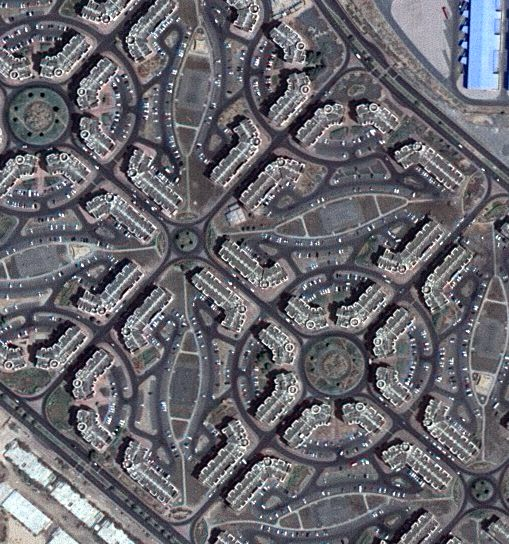

In [20]:
image

In [21]:
image.shape

(544, 509, 3)

In [22]:
(image.shape[0]//image_patch_size)*image_patch_size

512

In [23]:
image_dataset = []
mask_dataset = []


for image_type in ['images','masks']:
  if image_type == 'images':
    image_extension = 'jpg'
  elif image_type == 'masks':
    image_extension = 'png'
  for tile_id in range (1,8):
    for image_id in range (1,20):
      image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile {tile_id}/{image_type}/image_part_00{image_id}.{image_extension}',1)
      if image is not None:
        if image_type == 'masks':      #change mask images from rgb tp bgr
          image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        #print(image.shape)
        size_x = (image.shape[1]//image_patch_size)*image_patch_size
        size_y = (image.shape[0]//image_patch_size)*image_patch_size
        #print("{} --- {} - {}".format(image.shape, size_x, size_y))
        image = Image.fromarray(image)
        image = image.crop((0,0,size_x,size_y))
        #print("{}, {}".format(image.size[0],image.size[1]))
        image = np.array(image)
        patched_images = patchify(image,(image_patch_size,image_patch_size,3), step=image_patch_size)
        #print(len(patched_images))
        for i in range (patched_images.shape[0]):
          for j in range (patched_images.shape[1]):

            if image_type == 'images':

              individual_patched_image = patched_images[i,j,:,:]
              #print(individual_patched_image.shape)
              individual_patched_image = minmaxscaler.fit_transform(individual_patched_image.reshape(-1,individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)
              individual_patched_image =  individual_patched_image[0]
              #print(individual_patched_image.shape)
              image_dataset.append(individual_patched_image)

            elif image_type == 'masks':

              individual_patched_mask = patched_images[i,j,:,:]
              individual_patched_mask = individual_patched_mask[0]
              mask_dataset.append(individual_patched_mask)




In [24]:
print(len(image_dataset))
print(len(mask_dataset))


945
945


In [25]:
image_dataset = np.array(image_dataset)
mask_dataset = np.array(mask_dataset)

In [26]:
print(len(image_dataset))
print(len(mask_dataset))

945
945


In [27]:
type(image_dataset[0])

numpy.ndarray

In [28]:
type(np.reshape(image_dataset[0],(image_patch_size,image_patch_size,3)))

numpy.ndarray

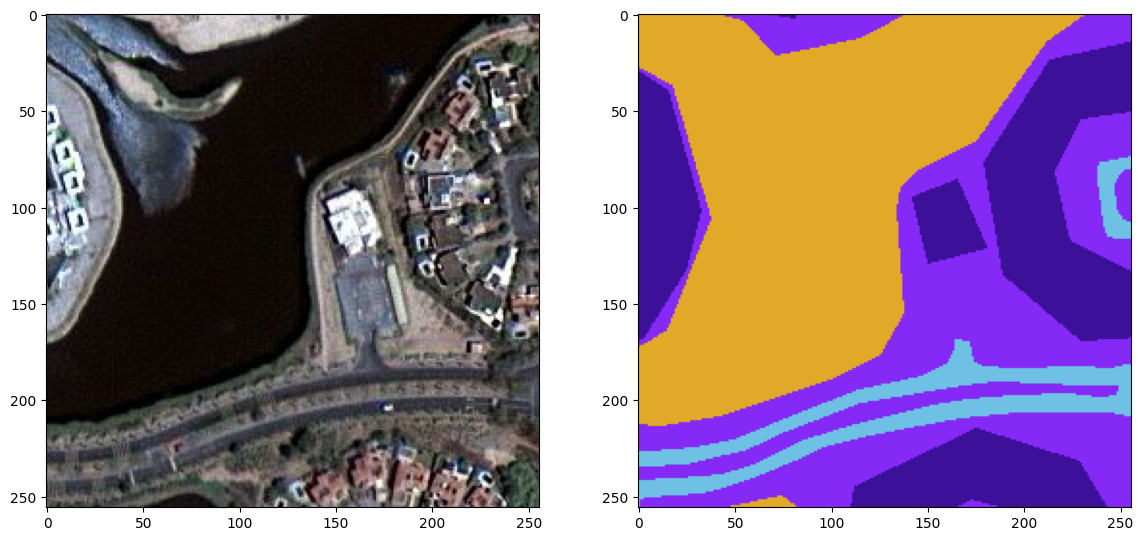

In [29]:
random_image_id = random.randint(0,len(image_dataset))

plt.figure(figsize = (14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
plt.imshow(mask_dataset[random_image_id])

next step , we gonna process the labels :
it's abt applying one hot encoding with labels hex image type to set RGB/label

In [30]:

class_building = '#3C1098'
class_building = class_building.lstrip('#')
class_building = np.array(tuple(int(class_building[i:i+2], 16) for i in (0,2,4)))
print(class_building)

class_land = '#8429F6'
class_land = class_land.lstrip('#')
class_land = np.array(tuple(int(class_land[i:i+2], 16) for i in (0,2,4)))
print(class_land)

class_road = '#6EC1E4'
class_road = class_road.lstrip('#')
class_road = np.array(tuple(int(class_road[i:i+2], 16) for i in (0,2,4)))
print(class_road)

class_vegetation = '#FEDD3A'
class_vegetation = class_vegetation.lstrip('#')
class_vegetation = np.array(tuple(int(class_vegetation[i:i+2], 16) for i in (0,2,4)))
print(class_vegetation)

class_water = '#E2A929'
class_water = class_water.lstrip('#')
class_water = np.array(tuple(int(class_water[i:i+2], 16) for i in (0,2,4)))
print(class_water)

class_unlabeled = '#9B9B9B'
class_unlabeled = class_unlabeled.lstrip('#')
class_unlabeled = np.array(tuple(int(class_unlabeled[i:i+2], 16) for i in (0,2,4)))
print(class_unlabeled)

[ 60  16 152]
[132  41 246]
[110 193 228]
[254 221  58]
[226 169  41]
[155 155 155]


In [31]:
mask_dataset.shape

(945, 256, 256, 3)

In [32]:
#make sure that the label is equal to his patsch mask
label = individual_patched_mask

In [33]:
def rgb_to_label(label):
  label_segment = np.zeros(label.shape , dtype=np.uint8 )

  label_segment[np.all(label == class_water, axis= -1)] = 0
  label_segment[np.all(label == class_land, axis= -1)] = 1
  label_segment[np.all(label == class_road, axis= -1)] = 2
  label_segment[np.all(label == class_building, axis= -1)] = 3
  label_segment[np.all(label == class_vegetation, axis= -1)] = 4
  label_segment[np.all(label == class_unlabeled, axis= -1)] = 5

  #print(label_segment)
  label_segment = label_segment[:,:,0]
  #print(label_segment)

  return label_segment

In [34]:
labels = []
for i in range(mask_dataset.shape[0]):
  label = rgb_to_label(mask_dataset[i])
  labels.append(label)


In [35]:
print(len(labels))

945


In [36]:
labels = np.array(labels)

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)
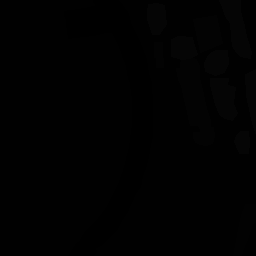

In [37]:
labels[0]

In [38]:
labels = np.expand_dims(labels,axis = 3)

In [39]:
labels[0]

array([[[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       ...,

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]]], dtype=uint8)

In [40]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5], dtype=uint8)

In [41]:
print("Total unique labels based on masks: ",format(np.unique(labels)))

Total unique labels based on masks:  [0 1 2 3 4 5]


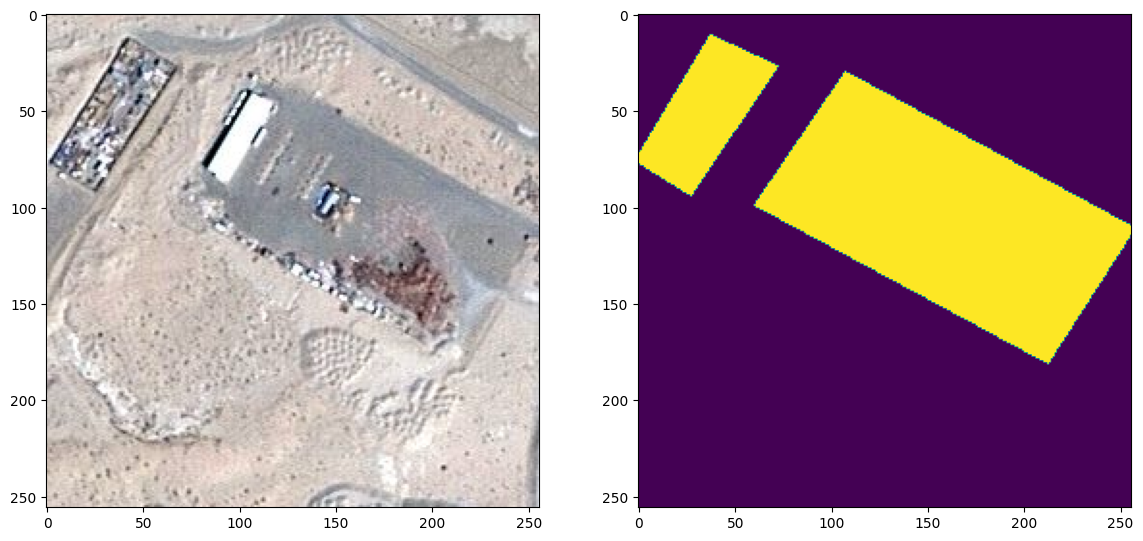

In [42]:
random_image_id = random.randint(0, len(image_dataset))

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
#plt.imshow(mask_dataset[random_image_id])
plt.imshow(labels[random_image_id][:,:,0])

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)
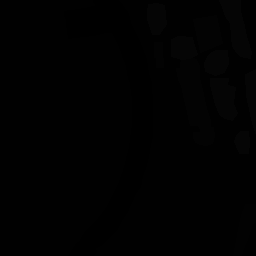

In [43]:
#what has been used in order to process the image below
labels[0][:,:,0]

at this point , we have the final dataset , our dataset that we need to train and test

In [44]:
#
total_classes = len(np.unique(labels))

In [45]:
total_classes

6

In [46]:
from tensorflow.keras.utils import to_categorical

In [47]:
labels_categorical_dataset = to_categorical(labels,num_classes = total_classes)

In [48]:
labels_categorical_dataset

array([[[[0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         ...,
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.]],

        [[0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         ...,
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.]],

        [[0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         ...,
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.]],

        ...,

        [[0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         ...,
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.]],

        [[0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         [0.

In [49]:
labels_categorical_dataset.shape

(945, 256, 256, 6)

In [50]:
master_training_dataset = image_dataset

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
x_train, x_test, y_train, y_test = train_test_split(master_training_dataset, labels_categorical_dataset,test_size=0.15, random_state=100)

In [53]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(803, 256, 256, 3)
(142, 256, 256, 3)
(803, 256, 256, 6)
(142, 256, 256, 6)


In [54]:
image_height = x_train.shape[1]
image_width = x_train.shape[2]
image_channels = x_train.shape[3]
total_classes = y_train.shape[3]

In [55]:
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)

256
256
3
6


Part 2: Deep Learning with Satellite Imagery Data

In [56]:
!pip install -U segmentation-models

In [57]:
from keras.models import Model
from keras.layers import Input,Conv2D , MaxPooling2D , UpSampling2D ,Conv2DTranspose
from keras.layers import concatenate , BatchNormalization, Dropout , Lambda

In [58]:
from keras import backend as K

In [59]:
def jaccard_coef(y_true, y_pred):
  y_true_flatten = K.flatten(y_true)
  y_pred_flatten = K.flatten(y_pred)
  intersection = K.sum(y_true_flatten * y_pred_flatten)
  final_coef_value = (intersection + 1.0) / (K.sum(y_true_flatten) + K.sum(y_pred_flatten) - intersection + 1.0)
  return final_coef_value


In [60]:
def multi_unet_model(n_classes=5, image_height=256, image_width=256, image_channels=1):

  inputs = Input((image_height, image_width, image_channels))

  source_input = inputs

  c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(source_input)
  c1 = Dropout(0.2)(c1)
  c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c1)
  p1 = MaxPooling2D((2,2))(c1)

  c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p1)
  c2 = Dropout(0.2)(c2)
  c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c2)
  p2 = MaxPooling2D((2,2))(c2)

  c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p2)
  c3 = Dropout(0.2)(c3)
  c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c3)
  p3 = MaxPooling2D((2,2))(c3)

  c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p3)
  c4 = Dropout(0.2)(c4)
  c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c4)
  p4 = MaxPooling2D((2,2))(c4)

  c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p4)
  c5 = Dropout(0.2)(c5)
  c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c5)

  u6 = Conv2DTranspose(128, (2,2), strides=(2,2), padding="same")(c5)
  u6 = concatenate([u6, c4])
  c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u6)
  c6 = Dropout(0.2)(c6)
  c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c6)

  u7 = Conv2DTranspose(64, (2,2), strides=(2,2), padding="same")(c6)
  u7 = concatenate([u7, c3])
  c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u7)
  c7 = Dropout(0.2)(c7)
  c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c7)

  u8 = Conv2DTranspose(32, (2,2), strides=(2,2), padding="same")(c7)
  u8 = concatenate([u8, c2])
  c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u8)
  c8 = Dropout(0.2)(c8)
  c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c8)

  u9 = Conv2DTranspose(16, (2,2), strides=(2,2), padding="same")(c8)
  u9 = concatenate([u9, c1], axis=3)
  c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u9)
  c9 = Dropout(0.2)(c9)
  c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c9)


  outputs = Conv2D(n_classes, (1,1), activation="softmax")(c9)

  model = Model(inputs=[inputs], outputs=[outputs])
  return model

In [61]:
metrics = ["accuracy", jaccard_coef]

In [62]:
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)

256
256
3
6


In [63]:
def get_deep_learning_model():
  return multi_unet_model(n_classes=total_classes,
                          image_height=image_height,
                          image_width=image_width,
                          image_channels=image_channels)

In [64]:
model = get_deep_learning_model()

In [65]:
model.get_config()

{'name': 'model',
 'trainable': True,
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 256, 256, 3),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'input_1'},
   'registered_name': None,
   'name': 'input_1',
   'inbound_nodes': []},
  {'module': 'keras.layers',
   'class_name': 'Conv2D',
   'config': {'name': 'conv2d',
    'trainable': True,
    'dtype': 'float32',
    'filters': 16,
    'kernel_size': (3, 3),
    'strides': (1, 1),
    'padding': 'same',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'groups': 1,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'HeNormal',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
     'registered_name': None},
    'kernel_regularizer': N

## Generating Loss Function

- dice loss > Focal Loss > Total Loss
- Total Loss = (Dice loss + (1*Focal Loss))

In [66]:
weights = [0.1666, 0.1666, 0.1666, 0.1666, 0.1666, 0.1666]

In [67]:
import keras
print(keras.__version__)

2.15.0


In [68]:
#a life saver , problem dyal les version hada bach t7el
%env SM_FRAMEWORK=tf.keras

env: SM_FRAMEWORK=tf.keras


In [69]:
import segmentation_models as sm

Segmentation Models: using `tf.keras` framework.


In [70]:
dice_loss = sm.losses.DiceLoss(class_weights = weights)

In [71]:
focal_loss = sm.losses.CategoricalFocalLoss()

In [72]:
total_loss = dice_loss + (1 * focal_loss)

## Model compilation

In [73]:
import tensorflow as tf

In [74]:
tf.keras.backend.clear_session()

In [75]:
model.compile(optimizer="adam", loss=total_loss, metrics=metrics)

In [76]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 16)         448       ['input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 256, 256, 16)         0         ['conv2d[0][0]']              
                                                                                                  
 conv2d_1 (Conv2D)           (None, 256, 256, 16)         2320      ['dropout[0][0]']             
                                                                                              

##model training

In [77]:
model_history = model.fit(x_train , y_train ,
                          batch_size = 16,
                          epochs = 100,
                          validation_data = (x_test , y_test),
                          shuffle = False)

Epoch 1/100
51/51 [==============================] - 53s 397ms/step - loss: 0.9993 - accuracy: 0.5832 - jaccard_coef: 0.2821 - val_loss: 0.9949 - val_accuracy: 0.6252 - val_jaccard_coef: 0.3033
Epoch 2/100
51/51 [==============================] - 11s 208ms/step - loss: 0.9874 - accuracy: 0.6662 - jaccard_coef: 0.3491 - val_loss: 0.9765 - val_accuracy: 0.6505 - val_jaccard_coef: 0.3948
Epoch 3/100
51/51 [==============================] - 11s 214ms/step - loss: 0.9743 - accuracy: 0.6881 - jaccard_coef: 0.4116 - val_loss: 0.9700 - val_accuracy: 0.6778 - val_jaccard_coef: 0.4210
Epoch 4/100
51/51 [==============================] - 11s 215ms/step - loss: 0.9667 - accuracy: 0.7067 - jaccard_coef: 0.4444 - val_loss: 0.9715 - val_accuracy: 0.6823 - val_jaccard_coef: 0.4639
Epoch 5/100
51/51 [==============================] - 11s 218ms/step - loss: 0.9594 - accuracy: 0.7236 - jaccard_coef: 0.4784 - val_loss: 0.9793 - val_accuracy: 0.6520 - val_jaccard_coef: 0.4182
Epoch 6/100
51/51 [===========

In [78]:
history_a = model_history

In [79]:
history_a.history

{'loss': [0.9993123412132263,
  0.9873719811439514,
  0.9742788076400757,
  0.9666786193847656,
  0.9593995213508606,
  0.9535686373710632,
  0.9501367807388306,
  0.9466257691383362,
  0.9420892596244812,
  0.9379501342773438,
  0.9338111281394958,
  0.9309455752372742,
  0.9275348782539368,
  0.9254254698753357,
  0.9248065948486328,
  0.9231168627738953,
  0.925926148891449,
  0.9242276549339294,
  0.9206568598747253,
  0.9179770350456238,
  0.9176074266433716,
  0.9163579940795898,
  0.9151606559753418,
  0.9144179821014404,
  0.9193080067634583,
  0.9135764241218567,
  0.9123019576072693,
  0.9109062552452087,
  0.9099734425544739,
  0.9090179204940796,
  0.9081802368164062,
  0.9079561829566956,
  0.9062080383300781,
  0.9058442115783691,
  0.9077247977256775,
  0.9055003523826599,
  0.9051052927970886,
  0.9032425284385681,
  0.9023471474647522,
  0.9011188745498657,
  0.9017099738121033,
  0.908778965473175,
  0.9038917422294617,
  0.9005411267280579,
  0.8981209397315979,
  0.

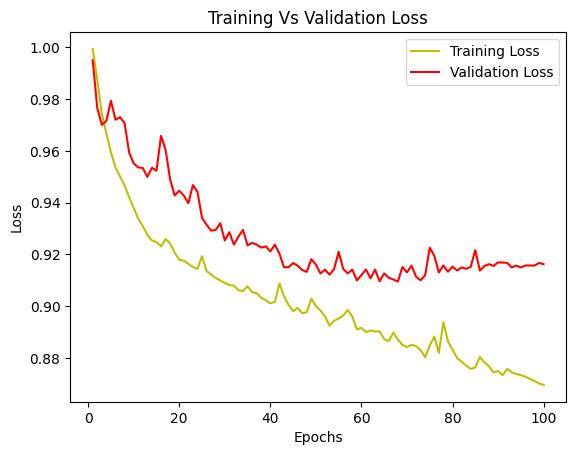

In [80]:
loss = history_a.history['loss']
val_loss = history_a.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label="Training Loss")
plt.plot(epochs, val_loss, 'r', label="Validation Loss")
plt.title("Training Vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [81]:
loss

[0.9993123412132263,
 0.9873719811439514,
 0.9742788076400757,
 0.9666786193847656,
 0.9593995213508606,
 0.9535686373710632,
 0.9501367807388306,
 0.9466257691383362,
 0.9420892596244812,
 0.9379501342773438,
 0.9338111281394958,
 0.9309455752372742,
 0.9275348782539368,
 0.9254254698753357,
 0.9248065948486328,
 0.9231168627738953,
 0.925926148891449,
 0.9242276549339294,
 0.9206568598747253,
 0.9179770350456238,
 0.9176074266433716,
 0.9163579940795898,
 0.9151606559753418,
 0.9144179821014404,
 0.9193080067634583,
 0.9135764241218567,
 0.9123019576072693,
 0.9109062552452087,
 0.9099734425544739,
 0.9090179204940796,
 0.9081802368164062,
 0.9079561829566956,
 0.9062080383300781,
 0.9058442115783691,
 0.9077247977256775,
 0.9055003523826599,
 0.9051052927970886,
 0.9032425284385681,
 0.9023471474647522,
 0.9011188745498657,
 0.9017099738121033,
 0.908778965473175,
 0.9038917422294617,
 0.9005411267280579,
 0.8981209397315979,
 0.8993370532989502,
 0.8973402380943298,
 0.897665917873

In [82]:
val_loss

[0.9949287176132202,
 0.9765328168869019,
 0.9699913263320923,
 0.971543550491333,
 0.979324221611023,
 0.9719815254211426,
 0.9729659557342529,
 0.9706979393959045,
 0.9593738913536072,
 0.9551069140434265,
 0.9535924196243286,
 0.9533467888832092,
 0.9499285221099854,
 0.9534489512443542,
 0.9523062705993652,
 0.9657443165779114,
 0.9603923559188843,
 0.9489787817001343,
 0.9427684545516968,
 0.9445689916610718,
 0.9427425861358643,
 0.9397817254066467,
 0.9467723965644836,
 0.944155752658844,
 0.9341450929641724,
 0.9314817190170288,
 0.9291609525680542,
 0.9294420480728149,
 0.9320807456970215,
 0.925400972366333,
 0.9285804033279419,
 0.9237957000732422,
 0.9269155859947205,
 0.9294670224189758,
 0.9235060811042786,
 0.9244676828384399,
 0.9238092303276062,
 0.9226482510566711,
 0.9230883121490479,
 0.9211902022361755,
 0.9237756729125977,
 0.9202944040298462,
 0.9150953888893127,
 0.9150760173797607,
 0.9166532754898071,
 0.915690004825592,
 0.9139824509620667,
 0.913277208805084

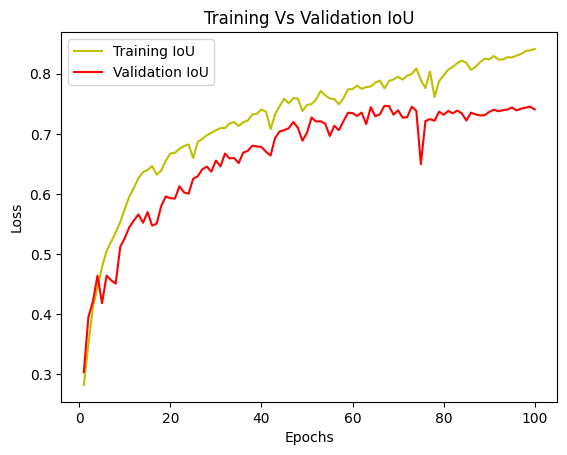

In [83]:
jaccard_coef = history_a.history['jaccard_coef']
val_jaccard_coef = history_a.history['val_jaccard_coef']

epochs = range(1, len(jaccard_coef) + 1)
plt.plot(epochs, jaccard_coef, 'y', label="Training IoU")
plt.plot(epochs, val_jaccard_coef, 'r', label="Validation IoU")
plt.title("Training Vs Validation IoU")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [84]:
model_history.params

{'verbose': 1, 'epochs': 100, 'steps': 51}

In [85]:
y_pred = model.predict(x_test)

5/5 [==============================] - 5s 54ms/step


In [86]:
len(y_pred)

142

In [91]:
y_pred

array([[[[1.12942252e-02, 5.48603952e-01, 2.83585250e-01,
          1.10334724e-01, 4.39047255e-02, 2.27715611e-03],
         [2.51221424e-03, 6.42545402e-01, 2.72622764e-01,
          5.85451536e-02, 2.34328881e-02, 3.41564359e-04],
         [1.89194607e-03, 6.25073016e-01, 2.98060060e-01,
          5.93641512e-02, 1.54184168e-02, 1.92424413e-04],
         ...,
         [1.58855470e-03, 7.68622339e-01, 4.67420779e-02,
          1.61803737e-01, 2.11697444e-02, 7.36254224e-05],
         [4.60747443e-03, 7.08292127e-01, 5.76561131e-02,
          1.93878904e-01, 3.53730731e-02, 1.92279767e-04],
         [2.29913089e-02, 5.82114339e-01, 1.17597669e-01,
          1.89523369e-01, 8.56540948e-02, 2.11919099e-03]],

        [[2.10465793e-03, 6.36348665e-01, 2.26294011e-01,
          1.04082957e-01, 3.09430063e-02, 2.26822085e-04],
         [2.25716707e-04, 7.23021626e-01, 2.19760597e-01,
          4.88185920e-02, 8.15636385e-03, 1.71582869e-05],
         [1.43693018e-04, 6.42063439e-01, 3.1042

In [89]:
y_pred_argmax = np.argmax(y_pred , axis = 3)

In [90]:
y_pred_argmax

array([[[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[2, 2, 2, ..., 3, 3, 3],
        [2, 2, 2, ..., 3, 3, 3],
        [2, 2, 2, ..., 3, 3, 3],
        ...,
        [2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2]],

       ...,

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [92]:
y_test_argmax = np.argmax(y_test, axis=3)

In [93]:
y_test_argmax

array([[[3, 3, 3, ..., 1, 1, 1],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        ...,
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        ...,
        [2, 2, 2, ..., 0, 0, 0],
        [2, 2, 2, ..., 0, 0, 0],
        [2, 2, 1, ..., 0, 0, 0]],

       ...,

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

##Comparing prediction result that we had
on va utiliser test images

In [95]:
import random

In [98]:
test_image_number = random.randint(0, len(x_test))

test_image = x_test[test_image_number]
ground_truth_image = y_test_argmax[test_image_number]

test_image_input = np.expand_dims(test_image, 0)

prediction = model.predict(test_image_input)
predicted_image = np.argmax(prediction, axis=3)
predicted_image = predicted_image[0,:,:]

1/1 [==============================] - 1s 1s/step


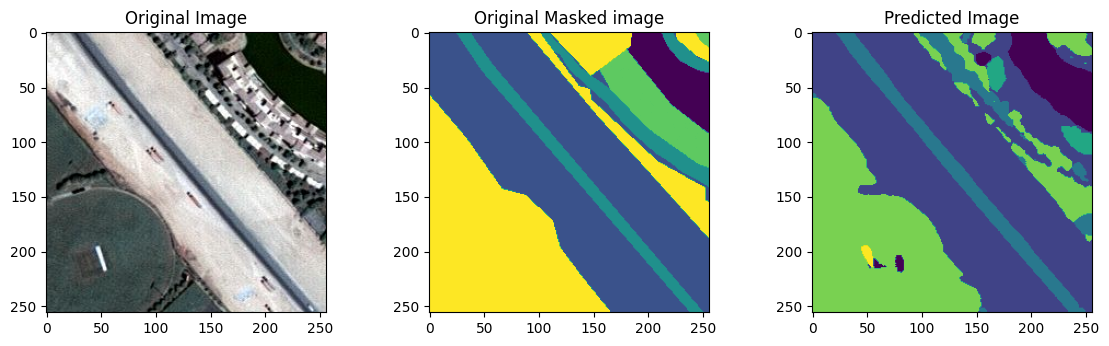

In [100]:
plt.figure(figsize=(14,8))
plt.subplot(231)
plt.title("Original Image")
plt.imshow(test_image)
plt.subplot(232)
plt.title("Original Masked image")
plt.imshow(ground_truth_image)
plt.subplot(233)
plt.title("Predicted Image")
plt.imshow(predicted_image)

In [101]:
model.save("satellite_segmentation_ended.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [102]:
!ls -lah

total 23M
drwxr-xr-x 1 root root 4.0K May  3 17:20 .
drwxr-xr-x 1 root root 4.0K May  3 15:32 ..
drwxr-xr-x 4 root root 4.0K May  1 13:19 .config
drwx------ 5 root root 4.0K May  3 15:33 drive
drwxr-xr-x 1 root root 4.0K May  1 13:20 sample_data
-rw-r--r-- 1 root root  23M May  3 17:20 satellite_segmentation_ended.h5
